In [1]:
# import necessary packages
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
seed = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_num_threads(8)
np.random.seed(seed)
torch.manual_seed(seed)
dtype = np.float32

In [3]:
# Build and transform the dataset
kwargs = {"num_workers": 1, "pin_memory": True}
trains = datasets.MNIST('./data', train=True, download=True,
                        transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,)),
                        ]))
tests = datasets.MNIST('./data', train=False,
                       transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,)),
                        ]))
batch_size = 50
train_loader = torch.utils.data.DataLoader(trains, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(tests, batch_size=batch_size, shuffle=True, **kwargs)

In [4]:
# construct your CNN model
# recall the architecture in class
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = torch.nn.Sequential(
            nn.Conv2d(in_channels = 1,
                      out_channels = 16,
                      kernel_size = 5,
                      stride = 1,
                      padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
         )
        self.conv2 = torch.nn.Sequential(
            nn.Conv2d(in_channels = 16,
                      out_channels = 32,
                      kernel_size = 5,
                      stride = 1,
                      padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.out = nn.Linear(32*7*7,10)
#         ... feel free to add more conv ...

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1) #flat
        output = self.out(x)
        x = F.log_softmax(output,dim=1)
        return output

In [5]:
cnn = CNN()

# learning rate
lr = 0.001

num_epochs = 1

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

In [6]:
loss_count = []
#run hour model
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x = Variable(x)
        y = Variable(y)
        output = cnn(x)
        loss = criterion(output,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%20 == 0:
            loss_count.append(loss)
            print('{}:\t'.format(i), loss.item())

0:	 2.298391819000244
20:	 0.8019713759422302
40:	 0.6691463589668274
60:	 0.4332978129386902
80:	 0.165974423289299
100:	 0.2768283784389496
120:	 0.36295098066329956
140:	 0.1765490025281906
160:	 0.21410627663135529
180:	 0.11063538491725922
200:	 0.1784515380859375
220:	 0.0586564727127552
240:	 0.12716764211654663
260:	 0.20876972377300262
280:	 0.09003323316574097
300:	 0.10319866240024567
320:	 0.09129230678081512
340:	 0.1200890988111496
360:	 0.19473373889923096
380:	 0.035309799015522
400:	 0.055809780955314636
420:	 0.04339432716369629
440:	 0.07503099739551544
460:	 0.10059560090303421
480:	 0.06602080166339874
500:	 0.08752937614917755
520:	 0.04663199558854103
540:	 0.017380937933921814
560:	 0.11798200756311417
580:	 0.14194020628929138
600:	 0.12523111701011658
620:	 0.013495011255145073
640:	 0.0336536206305027
660:	 0.022468362003564835
680:	 0.01639704778790474
700:	 0.03839060291647911
720:	 0.07362058013677597
740:	 0.04513496905565262
760:	 0.19066478312015533
780

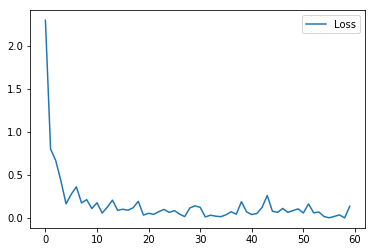

In [7]:
plt.figure('Loss')
plt.plot(loss_count,label='Loss')
plt.legend()
plt.show()

In [8]:
#test code
accuracy_count = []
for i, (test_x, test_y) in enumerate(test_loader):
    test_x = Variable(test_x)
    test_y = Variable(test_y)
    output = cnn(test_x)
    accuracy = torch.max(output,1)[1].numpy() == test_y.numpy()
    accuracy_count.append(accuracy.mean())
    if (i+1) % 100 == 0:
        print('accuracy:\t',accuracy.mean())

accuracy:	 0.98
accuracy:	 1.0


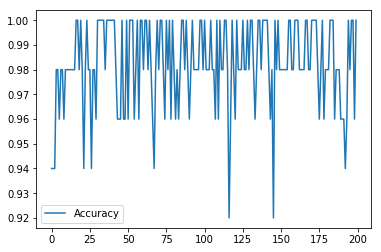

In [9]:
plt.figure('Accuracy')
plt.plot(accuracy_count,label='Accuracy')
plt.legend()
plt.show()